In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

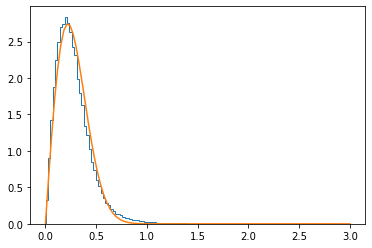

In [62]:
m=1000
p = 100
diferencias = np.zeros(m*(p-1))
cont = 0
#Simulamos 1000 matrices GOE
for i in range(m):
    #Simulamos la matriz y obtenemos sus eigenvalores
    Z = np.random.randn(p,p)
    matriz = (1)*(1/2)*(Z+np.transpose(Z))
    eigenvalues, eigenvectors = np.linalg.eigh(matriz)
    #Obtenemos las diferencias entre eigenvalores consecutivos
    for j in range(eigenvalues.size):
        if(j>0):
            diferencias[cont] = eigenvalues[j]-eigenvalues[j-1]
            cont = cont +1
C = np.mean(diferencias)#Obtenemos el promedio de las diferencias
#Graficamos la distribución empírica de las diferencias
Hist = plt.hist(diferencias,density=True,bins=100,histtype='step')
x = np.zeros(100)
y = np.zeros(100)
cont = 0
#Graficamos la conjetura de Weigner transformada
for i in np.linspace(0,3,100):
    x[cont] = i
    y[cont] = (mt.pi*i/(2*C*C))*np.exp(-1*mt.pi*i*i/(4*C*C))
    cont = cont+1
plt.plot(x,y)

In [47]:
from scipy import stats

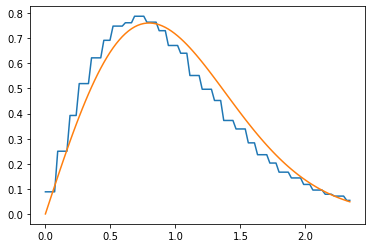

In [63]:
values = []
x2 = []
#Estimamos la transformación a la densidad (trasladar por un factor C)
for i in range(100):
        if(C*i<100):
            fl = mt.floor(C*i)
            values.append(Hist[0][fl]*C)
            x2.append(Hist[1][i])
plt.plot(x2,values)
x3 = []
y3 = []
cont = 0
#Calculamos la conjetura de Weigner
for i in x2:
    x3.append(i)
    y3.append((mt.pi*i/(2))*np.exp(-1*mt.pi*i*i/(4)))
plt.plot(x3,y3)

In [55]:
stats.kstest(values,y3)#test de kolmogorov smirnov

KstestResult(statistic=0.11, pvalue=0.5830090612540064)

In [65]:
def kl_divergence(p, q):#función para calcular la divergencia de kullback-leibler
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

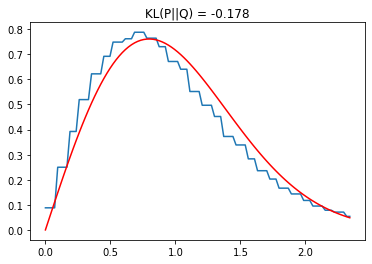

In [67]:
#Kullback-Leibler values-y3
p = np.array(values)
q = np.array(y3)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x2, p)
plt.plot(x2, q, c='red')

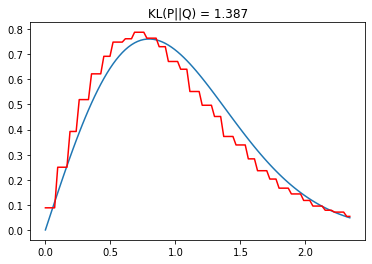

In [68]:
#kullback-leibler y3-values
p = np.array(y3)
q = np.array(values)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x2, p)
plt.plot(x2, q, c='red')

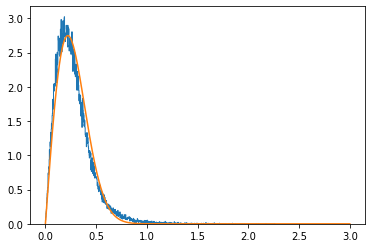

In [73]:
#El mismo procedimiento anterior pero ahora recuperamos 1000 bins del histograma
m=1000
p = 100
diferencias = np.zeros(m*(p-1))
cont = 0
#Simulamos 1000 matrices GOE
for i in range(m):
    #Simulamos la matriz y obtenemos sus eigenvalores
    Z = np.random.randn(p,p)
    matriz = (1)*(1/2)*(Z+np.transpose(Z))
    eigenvalues, eigenvectors = np.linalg.eigh(matriz)
    #Obtenemos las diferencias entre eigenvalores consecutivos
    for j in range(eigenvalues.size):
        if(j>0):
            diferencias[cont] = eigenvalues[j]-eigenvalues[j-1]
            cont = cont +1
C = np.mean(diferencias)#Obtenemos el promedio de las diferencias
#Graficamos la distribución empírica de las diferencias
Hist = plt.hist(diferencias,density=True,bins=1000,histtype='step')
x = np.zeros(1000)
y = np.zeros(1000)
cont = 0
#Graficamos la conjetura de Weigner transformada
for i in np.linspace(0,3,1000):
    x[cont] = i
    y[cont] = (mt.pi*i/(2*C*C))*np.exp(-1*mt.pi*i*i/(4*C*C))
    cont = cont+1
plt.plot(x,y)

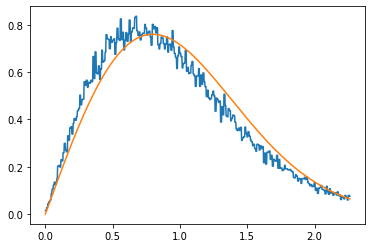

In [74]:
values = []
x2 = []
#Estimamos la transformación a la densidad (trasladar por un factor C)
for i in range(1000):
        if(C*i<1000):
            fl = mt.floor(C*i)
            values.append(Hist[0][fl]*C)
            x2.append(Hist[1][i])
plt.plot(x2,values)
x3 = []
y3 = []
cont = 0
#Calculamos la conjetura de Weigner
for i in x2:
    x3.append(i)
    y3.append((mt.pi*i/(2))*np.exp(-1*mt.pi*i*i/(4)))
plt.plot(x3,y3)

In [75]:
stats.kstest(values,y3)#test de kolmogorov-smirnov

KstestResult(statistic=0.091, pvalue=0.0005028776494501317)

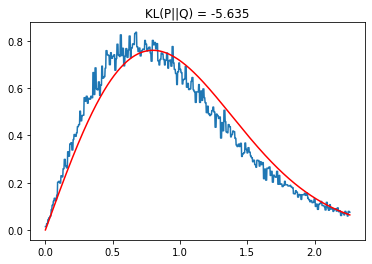

In [76]:
#kullback-leibler values-y3, da infinito porque hay valores uy cercanos a 0 en el dividendo
p = np.array(values)
q = np.array(y3)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x2, p)
plt.plot(x2, q, c='red')

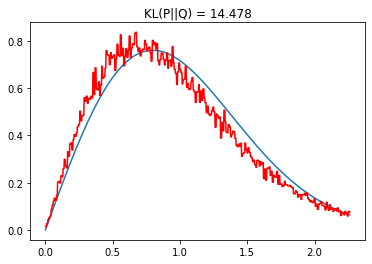

In [77]:
#kullback-leibler y3-values , igual tenemos problemas en el dividendo
p = np.array(y3)
q = np.array(values)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x2, p)
plt.plot(x2, q, c='red')

In [134]:
#Generamos una matriz simétrica H
p = 10
Z = np.random.randn(p,p)
H = (1)*(1/p)*(Z+np.transpose(Z))

In [135]:
#Calculamos sus eigenvalores y eigenvectores, inicializamos el Jacobiano
eigenvalues, eigenvectors = np.linalg.eigh(H)
dim = 55
J = np.zeros((dim,dim),dtype=float)

In [151]:
#Método de las diferencias finitas para calcular el Jacobiano 
#(perturbacion en los eigenvlores y eigenvectores causada por una perturbación en H)
epsilon = .00000001#Perturbación en los elementos de H
idx = 0#Conteo de la columna que llenaremos en el Jacobiano
trian = np.tril(np.ones(p))
#Recorremos cada elemento único de H
for a in range(p):
    for b in range(a,p):
        #Calculamos la matriz H', al perturbar el elemento i,j
        E = np.zeros((p,p))
        E[a,b] = 1
        E[b,a] = 1
        H_prime = H+ epsilon*E
        #Calculamos sus eigenvalores y eigenvectores
        new_eigenvalues ,new_eigenvectors = np.linalg.eigh(H_prime)
        #Calculamos la perturbación o el diferencial producido en los eigenvalores
        d_eigenvalues = (new_eigenvalues-eigenvalues)/epsilon
        #Calculamos la perturbación o el diferencial producido en los eigenvectores
        QdQ = np.transpose(eigenvectors).dot(new_eigenvectors-eigenvectors)/epsilon
        #Agregamos una columna al Jacobiano
        J[0:p,idx] = d_eigenvalues#Agregamos el diferencial de los eigenvalores
        #Seleccionamos los elementos únicos del diferencial de eigenvectores(la parte superior)
        QdQ2 = np.ma.array(QdQ,mask=trian)
        QdQ2 = QdQ2.compressed()
        J[p:dim,idx] = QdQ2
        idx = idx+1

In [153]:
print(np.abs(1/np.linalg.det(np.vander(eigenvalues))))#determinanate del Jacobiano teórico
print(np.abs(np.linalg.det(J)))#determinante del Jacobiano estimado
print(np.abs(np.linalg.det(J))-1/np.abs(np.linalg.det(np.vander(eigenvalues))))#ERROR ABSOLUTO
#ERROR RELATIVO
print((np.abs(np.linalg.det(J))-1/np.abs(np.linalg.det(np.vander(eigenvalues))))/np.abs(np.linalg.det(J)))

-1194942570934004.8
1194942634453834.5
63519829.75
5.31572210401821e-08


In [4]:
import quadpy

In [26]:
#Generamos los valores reales e imaginarios para los valores de z que evaluaremos
real = np.random.uniform(-np.sqrt(2)+.001,np.sqrt(2)-.001,10)
imaginario = np.random.uniform(0.00001,.02,10)

In [27]:
#Función del integrando para la integral de la parte real
def realf(x):
    return (np.sqrt(2-x*x)*(a-x))/(((a-x)*(a-x)+epsilon*epsilon))
#Función del integrando para la integral de la parte imaginaria
def imagf(x):
    return (np.sqrt(2-x*x))/(((a-x)*(a-x)+epsilon*epsilon))
error_real = 0.0
error_imaginario = 0.0
#Para cada valor de z
for i in range(10):
    a = real[i]
    epsilon = imaginario[i]
    #Estimamos la integral de la parte real e imaginaria para el valor de z elegido
    res, err = quadpy.quad(realf,-np.sqrt(2),np.sqrt(2))
    res2, err2 = quadpy.quad(imagf,-np.sqrt(2),np.sqrt(2))
    #Calculamos el resolvente con la fórmula compacta z+-sqrt(z*z-2)
    z = complex(a,-epsilon)
    if(a<0):
        G = z+np.sqrt(z*z-2)
    else :
        G = z-np.sqrt(z*z-2)
    #Calculamos el error relativo para la parte real e imaginaria del resolvente evaluado en z
    rr = G.real
    ii = G.imag
    error_real = error_real + np.abs((res/mt.pi-rr)/rr)
    error_imaginario = error_imaginario + np.abs((res2*epsilon/mt.pi-ii)/ii)
#Calculamos los errores relativos promedio
error_real = error_real/10
error_imaginario = error_imaginario/10
#Imprimimos los errores relativos promedio de las partes real e imaginaria del resolvente
print(error_real)
print(error_imaginario)

2.8759375928325693e-09
8.942311723814637e-10


In [36]:
#Usando el método de estimación por rectángulos
real_error = 0
imag_error = 0
for j in range(10):
    x = real[j]
    epsilon = imaginario[j]
    estimate = np.zeros(1000000)
    estimate2 = np.zeros(1000000)
    estimate3 = np.zeros(1000000)
    cont = 0
    z = complex(x,-epsilon)
    #Calculamos el integrando para 1000000 valores en una partición del soporte
    for i in np.linspace(-1*np.sqrt(2)+.0001,np.sqrt(2)-.0001,1000000):
        estimate[cont] = (np.sqrt(2-i*i)*(x-i))/(((x-i)*(x-i)+epsilon*epsilon))
        estimate2[cont] = (np.sqrt(2-i*i))/(((x-i)*(x-i)+epsilon*epsilon))
        cont = cont +1
    #Calculamos la estimación de la integral para las partes reales e imaginarias
    estimate = np.mean(estimate)*2*np.sqrt(2)
    estimate2 = epsilon*np.mean(estimate2)*2*np.sqrt(2)
    #Calculamos el resolvente mediante fórmula
    if(x<0):
        G = z+np.sqrt(z*z-2)
    else :
        G = z-np.sqrt(z*z-2)
    rr = G.real
    ii = G.imag
    #Calculamos el error relativo
    real_error = real_error + np.abs((estimate/mt.pi-rr)/rr)
    imag_error = imag_error + np.abs((estimate2/mt.pi-ii)/ii)
    print(G)
    print(complex(estimate/mt.pi,estimate2/mt.pi))
#Devolvemos el error relativo promedio
real_error = real_error/10
imag_error =imag_error/10

(-0.3158003303846655+1.372599582701688j)
(-0.31582246324305907+1.3726952720300374j)
(0.3299835150530101+1.3728485580109864j)
(0.3300066422018521+1.3729442660743887j)
(-0.4605983818069784+1.3160686309491756j)
(-0.46063067581171635+1.3161603722525328j)
(0.22844354174433174+1.384755928177905j)
(0.2284595504268691+1.3848524632534458j)
(1.1847375147829464+0.7475834544070852j)
(1.1848215757880705+0.7476355198480309j)
(0.22003920386861328+1.3911049034552074j)
(0.22005462315931865+1.3912018830151878j)
(-1.0985385487986232+0.8556997763175745j)
(-1.0986161646240855+0.8557593784969751j)
(-0.19963317984140094+1.3900429034206914j)
(-0.19964716907066785+1.3901398074521587j)
(1.0725474835198094+0.882533370992735j)
(1.0726231998837459+0.8825948420113499j)
(-0.24346419722789334+1.3826128265153517j)
(-0.24348125881587152+1.3827092123033204j)


In [37]:
print(real_error)
print(imag_error)

7.027912560309205e-05
6.969410479307525e-05
